In [1]:
# Relevant Imports
import os
import skimage.io
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [2]:
# Function for importing all the images and labels
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []      
    for d in directories:        
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f)                
                      for f in os.listdir(label_directory)]
        for f in file_names:            
            images.append(skimage.io.imread(f))            
            labels.append(int(d))      
    return images, labels

In [3]:
# Paths for the training and testing images
train_data_path = os.path.join(os.getcwd(), 'data', 'MNIST fashion dataset', 'training')
test_data_path = os.path.join(os.getcwd(), 'data', 'MNIST fashion dataset', 'testing')

In [4]:
# Load the data
images, labels = load_data(train_data_path)
test_images, test_labels = load_data(test_data_path)

In [5]:
# Convert data to numpy arrays
images = np.asarray(images)
test_images = np.asarray(test_images)
labels = np.asarray(labels)
test_labels = np.asarray(test_labels)

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_images, validation_images, train_labels, validation_labels = train_test_split(images, 
                                                                                    labels, 
                                                                                    train_size=0.9, 
                                                                                    test_size=0.1,
                                                                                    random_state=4)

In [7]:
print(train_images.shape, train_labels.shape)

(54000, 28, 28) (54000,)


In [8]:
print(validation_images.shape, validation_labels.shape)

(6000, 28, 28) (6000,)


In [9]:
print(test_images.shape,test_labels.shape)

(10000, 28, 28) (10000,)


## Data Preprocessing

In [10]:
# Reshape the images into arrays
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0], num_pixels).astype('float32')
validation_images = validation_images.reshape(validation_images.shape[0], num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

In [11]:
# Normalise the data
train_images = train_images/255
validation_images = validation_images/255
test_images = test_images/255

In [12]:
from keras.utils import np_utils

# One hot encode labels
train_labels = np_utils.to_categorical(train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = train_labels.shape[1]

/Users/ap/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Implementation

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# Create the model with the given hidden nodes
def create_model(hidden_nodes, X_train, X_validation, y_train, y_validation):
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist = model.fit(X_train, y_train, 
                     validation_data=(X_validation, y_validation), 
                     epochs=10)
    return(model, hist)

# Plot the results of the model fitting/history
def plot_results(fig_no, x1, x2, ylabel, title,):
    # Make of copy of the results and a new child for 0 epochs
    x1_copy = x1.copy()
    x1_copy.insert(0, None)
    x2_copy = x2.copy()
    x2_copy.insert(0, None)
    
    plt.figure(fig_no)
    plt.plot(x1_copy, 'r')
    plt.plot(x2_copy, 'g')
    plt.xticks(np.arange(1, 11, 1))
    plt.xlabel('Num of Epochs')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(['train', 'validation'])
    plt.show()

# Function for getting the accuracy score of the model 
def get_results(model, hist):
    training_accuracy = hist.history['acc']
    validation_accuracy = hist.history['val_acc']
    training_error = hist.history['loss']
    validation_error = hist.history['val_loss']
    
    scores = model.evaluate(test_images, test_labels, verbose=0)
    print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
    print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))
    
    # Plot the results
    plot_results(0, training_accuracy, validation_accuracy, 'Accuracy',
                 'Training Accuracy vs Validation Accuracy')
    plot_results(1, training_error, validation_error, 'Loss',
                 'Training Loss vs Validation Loss')
    
    return((np.mean(training_accuracy), np.mean(validation_accuracy), scores[1]*100))

78 hidden nodes
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 57us/step - loss: 0.5216 - acc: 0.8183 - val_loss: 0.4219 - val_acc: 0.8447
Epoch 2/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.3908 - acc: 0.8606 - val_loss: 0.3720 - val_acc: 0.8622
Epoch 3/10
54000/54000 [==============================] - 3s 53us/step - loss: 0.3552 - acc: 0.8717 - val_loss: 0.3641 - val_acc: 0.8673
Epoch 4/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.3279 - acc: 0.8808 - val_loss: 0.3370 - val_acc: 0.8842
Epoch 5/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.3099 - acc: 0.8867 - val_loss: 0.3188 - val_acc: 0.8800
Epoch 6/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.2952 - acc: 0.8919 - val_loss: 0.3422 - val_acc: 0.8698
Epoch 7/10
54000/54000 [==============================] - 3s 53us/step - loss: 0.2832 - acc: 0.8954 - val_loss: 0

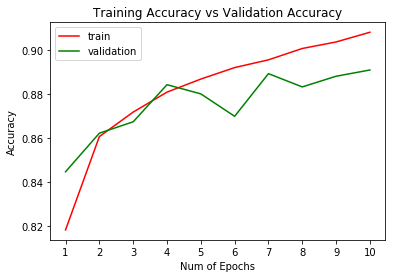

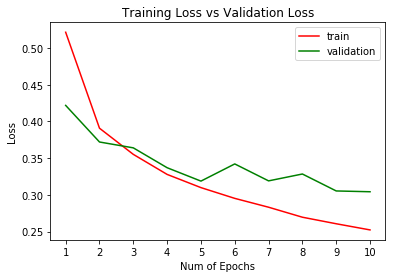


254 hidden nodes
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 86us/step - loss: 0.4946 - acc: 0.8242 - val_loss: 0.3881 - val_acc: 0.8650
Epoch 2/10
54000/54000 [==============================] - 4s 81us/step - loss: 0.3697 - acc: 0.8654 - val_loss: 0.3859 - val_acc: 0.8570
Epoch 3/10
54000/54000 [==============================] - 4s 81us/step - loss: 0.3311 - acc: 0.8788 - val_loss: 0.3519 - val_acc: 0.8723
Epoch 4/10
54000/54000 [==============================] - 4s 82us/step - loss: 0.3070 - acc: 0.8870 - val_loss: 0.3131 - val_acc: 0.8872
Epoch 5/10
54000/54000 [==============================] - 4s 82us/step - loss: 0.2886 - acc: 0.8928 - val_loss: 0.3250 - val_acc: 0.8818
Epoch 6/10
54000/54000 [==============================] - 4s 81us/step - loss: 0.2734 - acc: 0.8972 - val_loss: 0.3342 - val_acc: 0.8795
Epoch 7/10
54000/54000 [==============================] - 4s 82us/step - loss: 0.2602 - acc: 0.9024 - val_loss:

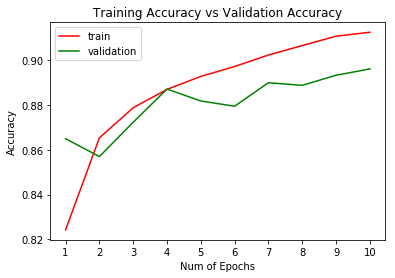

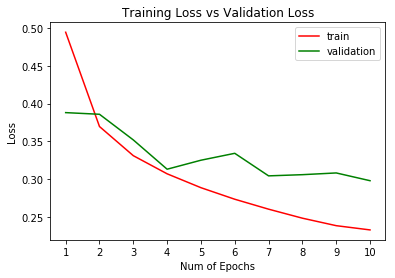


431 hidden nodes
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 136us/step - loss: 0.4903 - acc: 0.8254 - val_loss: 0.3879 - val_acc: 0.8562
Epoch 2/10
54000/54000 [==============================] - 7s 129us/step - loss: 0.3669 - acc: 0.8661 - val_loss: 0.3456 - val_acc: 0.8728
Epoch 3/10
54000/54000 [==============================] - 7s 130us/step - loss: 0.3310 - acc: 0.8781 - val_loss: 0.3240 - val_acc: 0.8850
Epoch 4/10
54000/54000 [==============================] - 7s 130us/step - loss: 0.3076 - acc: 0.8854 - val_loss: 0.3225 - val_acc: 0.8857
Epoch 5/10
54000/54000 [==============================] - 7s 130us/step - loss: 0.2883 - acc: 0.8934 - val_loss: 0.3306 - val_acc: 0.8743
Epoch 6/10
54000/54000 [==============================] - 7s 130us/step - loss: 0.2709 - acc: 0.8980 - val_loss: 0.2994 - val_acc: 0.8897
Epoch 7/10
54000/54000 [==============================] - 7s 129us/step - loss: 0.2561 - acc: 0.9043 - va

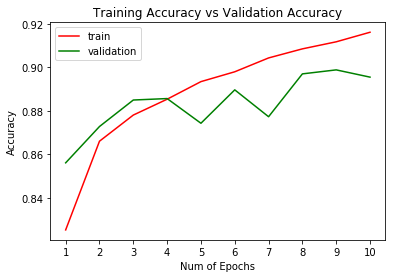

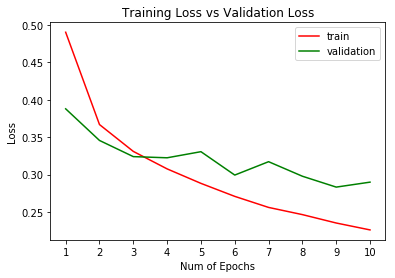


607 hidden nodes
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 11s 197us/step - loss: 0.4848 - acc: 0.8265 - val_loss: 0.3839 - val_acc: 0.8637
Epoch 2/10
54000/54000 [==============================] - 10s 189us/step - loss: 0.3677 - acc: 0.8658 - val_loss: 0.3638 - val_acc: 0.8662
Epoch 3/10
54000/54000 [==============================] - 10s 189us/step - loss: 0.3292 - acc: 0.8784 - val_loss: 0.3380 - val_acc: 0.8775
Epoch 4/10
54000/54000 [==============================] - 11s 198us/step - loss: 0.3044 - acc: 0.8870 - val_loss: 0.3237 - val_acc: 0.8832
Epoch 5/10
54000/54000 [==============================] - 10s 189us/step - loss: 0.2846 - acc: 0.8947 - val_loss: 0.3041 - val_acc: 0.8880
Epoch 6/10
54000/54000 [==============================] - 10s 189us/step - loss: 0.2688 - acc: 0.8992 - val_loss: 0.3050 - val_acc: 0.8912
Epoch 7/10
54000/54000 [==============================] - 10s 190us/step - loss: 0.2557 - acc: 0.90

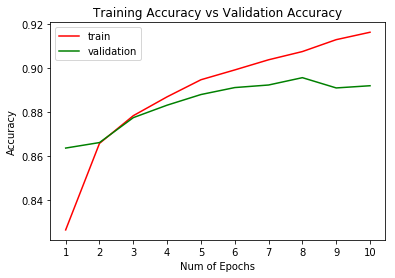

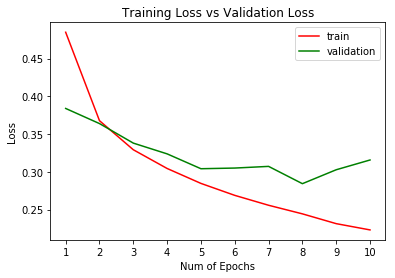


784 hidden nodes
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 13s 241us/step - loss: 0.4842 - acc: 0.8277 - val_loss: 0.3637 - val_acc: 0.8642
Epoch 2/10
54000/54000 [==============================] - 13s 235us/step - loss: 0.3658 - acc: 0.8659 - val_loss: 0.3517 - val_acc: 0.8740
Epoch 3/10
54000/54000 [==============================] - 13s 234us/step - loss: 0.3256 - acc: 0.8816 - val_loss: 0.3357 - val_acc: 0.8740
Epoch 4/10
54000/54000 [==============================] - 13s 233us/step - loss: 0.3038 - acc: 0.8866 - val_loss: 0.3461 - val_acc: 0.8732
Epoch 5/10
54000/54000 [==============================] - 13s 233us/step - loss: 0.2843 - acc: 0.8942 - val_loss: 0.3155 - val_acc: 0.8843
Epoch 6/10
54000/54000 [==============================] - 14s 261us/step - loss: 0.2683 - acc: 0.8996 - val_loss: 0.3098 - val_acc: 0.8860
Epoch 7/10
54000/54000 [==============================] - 15s 278us/step - loss: 0.2552 - acc: 0.90

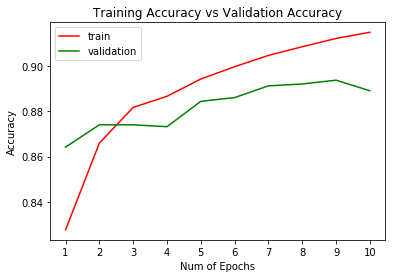

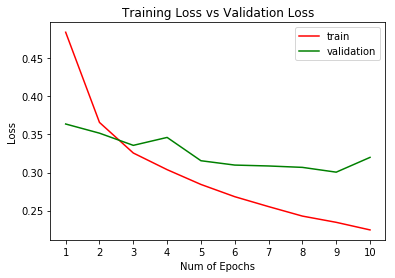

In [14]:
hidden_nodes = [78, 254, 431, 607, 784]
accuracy_scores = []

for hidden_node in hidden_nodes:
        print(hidden_node, 'hidden nodes')
        model, hist = create_model(hidden_node, train_images, validation_images, train_labels, validation_labels)
        training_accuracy, validation_accuracy, test_accuracy = get_results(model, hist)
        accuracy_scores.append([hidden_node, training_accuracy, validation_accuracy, test_accuracy])
        print()

In [15]:
accuracy_scores

[[78, 0.8817648148148148, 0.8759333333333335, 87.76],
 [254, 0.8877814814814815, 0.8811166666666667, 88.3],
 [431, 0.8886962962962963, 0.8832333333333333, 88.94],
 [607, 0.8892111111111112, 0.8840666666666668, 88.29],
 [784, 0.8895481481481482, 0.8821499999999999, 88.08]]

In [16]:
# Sort the accuracy scores by the test accuracy
accuracy_scores_sorted = sorted(accuracy_scores, key=lambda x:x[3], reverse=True)
accuracy_scores_sorted

[[431, 0.8886962962962963, 0.8832333333333333, 88.94],
 [254, 0.8877814814814815, 0.8811166666666667, 88.3],
 [607, 0.8892111111111112, 0.8840666666666668, 88.29],
 [784, 0.8895481481481482, 0.8821499999999999, 88.08],
 [78, 0.8817648148148148, 0.8759333333333335, 87.76]]

In [17]:
# Store the best hidden node amount
hidden_nodes = accuracy_scores_sorted[0][0]

## KFold Cross Validation

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 166us/step - loss: 0.5032 - acc: 0.8197 - val_loss: 0.4040 - val_acc: 0.8571
Epoch 2/10
48000/48000 [==============================] - 7s 149us/step - loss: 0.3710 - acc: 0.8650 - val_loss: 0.3878 - val_acc: 0.8606
Epoch 3/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.3373 - acc: 0.8760 - val_loss: 0.3566 - val_acc: 0.8652
Epoch 4/10
48000/48000 [==============================] - 8s 157us/step - loss: 0.3093 - acc: 0.8851 - val_loss: 0.3383 - val_acc: 0.8768
Epoch 5/10
48000/48000 [==============================] - 8s 177us/step - loss: 0.2903 - acc: 0.8929 - val_loss: 0.3200 - val_acc: 0.8840
Epoch 6/10
48000/48000 [==============================] - 8s 157us/step - loss: 0.2729 - acc: 0.8986 - val_loss: 0.3290 - val_acc: 0.8821
Epoch 7/10
48000/48000 [==============================] - 8s 159us/step - loss: 0.2614 - acc: 0.9012 - val_loss: 0.3053 - 

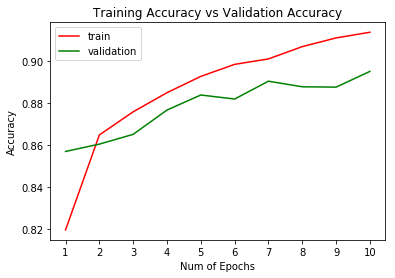

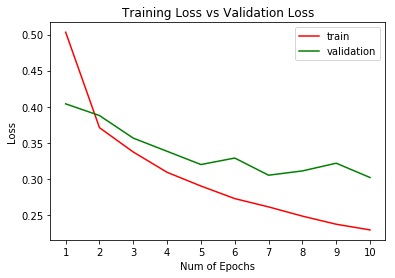

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 141us/step - loss: 0.4989 - acc: 0.8212 - val_loss: 0.3958 - val_acc: 0.8566
Epoch 2/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.3738 - acc: 0.8630 - val_loss: 0.3600 - val_acc: 0.8734
Epoch 3/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.3380 - acc: 0.8754 - val_loss: 0.3473 - val_acc: 0.8702
Epoch 4/10
48000/48000 [==============================] - 7s 140us/step - loss: 0.3106 - acc: 0.8852 - val_loss: 0.3255 - val_acc: 0.8822
Epoch 5/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.2908 - acc: 0.8926 - val_loss: 0.3183 - val_acc: 0.8852
Epoch 6/10
48000/48000 [==============================] - 7s 140us/step - loss: 0.2734 - acc: 0.8981 - val_loss: 0.3038 - val_acc: 0.8901
Epoch 7/10
48000/48000 [==============================] - 7s 145us/step - loss: 0.2624 - acc: 0.9033 - val_loss: 0.3111 - 

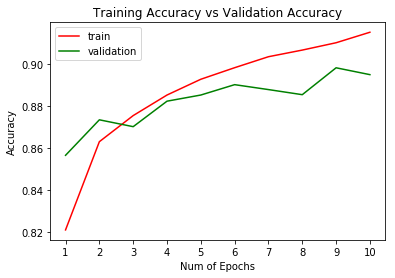

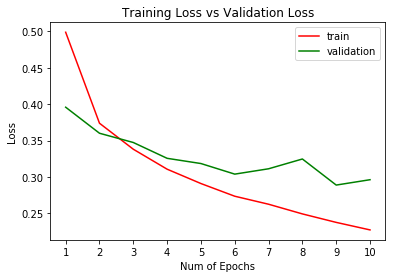

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 147us/step - loss: 0.4982 - acc: 0.8236 - val_loss: 0.3931 - val_acc: 0.8593
Epoch 2/10
48000/48000 [==============================] - 7s 141us/step - loss: 0.3740 - acc: 0.8626 - val_loss: 0.3556 - val_acc: 0.8728
Epoch 3/10
48000/48000 [==============================] - 7s 153us/step - loss: 0.3364 - acc: 0.8764 - val_loss: 0.3313 - val_acc: 0.8811
Epoch 4/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.3106 - acc: 0.8851 - val_loss: 0.3334 - val_acc: 0.8795
Epoch 5/10
48000/48000 [==============================] - 7s 137us/step - loss: 0.2895 - acc: 0.8931 - val_loss: 0.3191 - val_acc: 0.8848
Epoch 6/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.2727 - acc: 0.8983 - val_loss: 0.3060 - val_acc: 0.8941
Epoch 7/10
48000/48000 [==============================] - 7s 146us/step - loss: 0.2622 - acc: 0.9016 - val_loss: 0.3097 - 

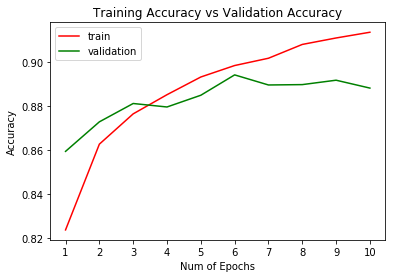

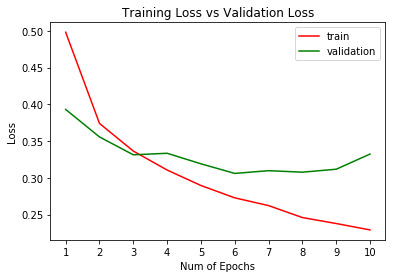

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.4952 - acc: 0.8244 - val_loss: 0.4009 - val_acc: 0.8592
Epoch 2/10
48000/48000 [==============================] - 6s 132us/step - loss: 0.3724 - acc: 0.8631 - val_loss: 0.3639 - val_acc: 0.8633
Epoch 3/10
48000/48000 [==============================] - 6s 130us/step - loss: 0.3316 - acc: 0.8782 - val_loss: 0.3455 - val_acc: 0.8722
Epoch 4/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.3056 - acc: 0.8863 - val_loss: 0.3478 - val_acc: 0.8747
Epoch 5/10
48000/48000 [==============================] - 6s 126us/step - loss: 0.2886 - acc: 0.8923 - val_loss: 0.3402 - val_acc: 0.8769
Epoch 6/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.2703 - acc: 0.8996 - val_loss: 0.3347 - val_acc: 0.8834
Epoch 7/10
48000/48000 [==============================] - 6s 132us/step - loss: 0.2574 - acc: 0.9040 - val_loss: 0.3108 - 

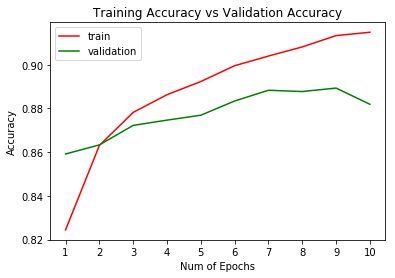

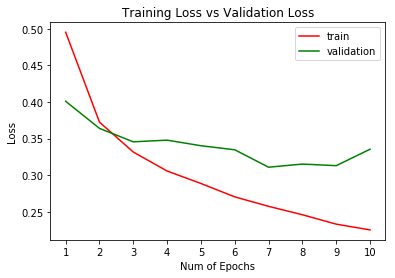

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 137us/step - loss: 0.4924 - acc: 0.8265 - val_loss: 0.4334 - val_acc: 0.8406
Epoch 2/10
48000/48000 [==============================] - 6s 130us/step - loss: 0.3707 - acc: 0.8648 - val_loss: 0.3678 - val_acc: 0.8672
Epoch 3/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.3313 - acc: 0.8790 - val_loss: 0.3594 - val_acc: 0.8670
Epoch 4/10
48000/48000 [==============================] - 6s 130us/step - loss: 0.3064 - acc: 0.8869 - val_loss: 0.3439 - val_acc: 0.8729
Epoch 5/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.2872 - acc: 0.8943 - val_loss: 0.3318 - val_acc: 0.8812
Epoch 6/10
48000/48000 [==============================] - 6s 126us/step - loss: 0.2729 - acc: 0.8988 - val_loss: 0.3297 - val_acc: 0.8814
Epoch 7/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.2592 - acc: 0.9037 - val_loss: 0.3386 - 

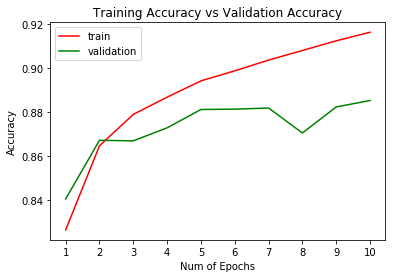

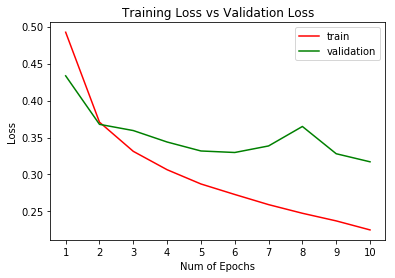

In [18]:
from sklearn.model_selection import StratifiedKFold 

skf = StratifiedKFold(n_splits=5, random_state=4)
skf_accuracy_scores = []
n = 1

for train_index, validation_index in skf.split(images, labels):
    # Split the images/labels
    skf_train_images, skf_train_labels = images[train_index], labels[train_index]
    skf_validation_images, skf_validation_labels = images[validation_index], labels[validation_index]
    
    # Preprocess data
    num_pixels = skf_train_images.shape[1] * skf_train_images.shape[2]
    skf_train_images = skf_train_images.reshape(skf_train_images.shape[0], num_pixels).astype('float32')
    skf_validation_images = skf_validation_images.reshape(skf_validation_images.shape[0], num_pixels).astype('float32')
    skf_train_images = skf_train_images/255
    skf_validation_images = skf_validation_images/255
    
    # One hot encode labels
    skf_train_labels = np_utils.to_categorical(skf_train_labels)
    skf_validation_labels = np_utils.to_categorical(skf_validation_labels)

    skf_model, skf_hist = create_model(hidden_nodes, skf_train_images, skf_validation_images, skf_train_labels, skf_validation_labels)
    skf_training_accuracy, skf_validation_accuracy, skf_test_accuracy = get_results(skf_model, skf_hist)
    
    skf_accuracy_scores.append([n, skf_test_accuracy])
    n += 1

In [19]:
skf_accuracy_scores

[[1, 88.52], [2, 88.49000000000001], [3, 87.6], [4, 87.71], [5, 88.26]]

In [20]:
# Get the mean
np.mean([skf_accuracy_scores[0][1],
         skf_accuracy_scores[1][1],
         skf_accuracy_scores[2][1],
         skf_accuracy_scores[3][1],
         skf_accuracy_scores[4][1]])

88.116

In [21]:
# Get the standard deviaton
np.std([skf_accuracy_scores[0][1],
        skf_accuracy_scores[1][1],
        skf_accuracy_scores[2][1],
        skf_accuracy_scores[3][1],
        skf_accuracy_scores[4][1]])

0.3885665966086163

## Results

#### Mutli Layer Perceptron

*Hidden Nodes: Test Accuracy %*
- 78: 87.76%
- 254: 88.30%
- 431: 88.94%
- 607: 88.29%
- 784: 88.08%
    
    
#### Stratified KFold with 431 Hidden Nodes

*FoldTest Accuracy %*
- 1: 88.52%
- 2: 88.49%
- 3: 87.60%
- 4: 87.71%
- 5: 88.26%

*Mean:* 88.12

*Standard Deviation:* 0.39